<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220515_%EB%B6%84%EB%A5%98%EB%B6%84%EC%84%9D_weatherAUS_%EB%8B%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------
### **2. (분류분석) weatherAUS 데이터 셋을 활용하여**
#### 2-1 데이터 요약 값을 보고 NA값이 10,000개 이상인 열을 제외하고 남은 변수중 NA값이 있는 행을 제거하시오
#### 2-2 그리고 AUS 데이터의 Date변수를 Date형으로 변환하고, 전처리가 된 weatherAUS 데이터를 train(70%), test(30%)로 분할하시오 (set.seed(6789))
####2-3 train 데이터로 RainTomorrow를 예측하는 분류모델을 1개 생성하고, test데이터에 대한 예측값을 csv 파일로 제출 하시오
--------------------------------------------------------------------------

---------------------------**목차**---------------------------
1. 패키지 및 데이터 로드
2. 데이터 전처리 (2-1), (2-2)
3. 모델링<br>
4. 파라미터 튜닝<br>
5. 평가(2-3) 


## 1. 패키지 및 데이터 로드

In [3]:
install.packages(c("randomForest","caret"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [4]:
library(dplyr)
library(randomForest) #rf
library(caret) #parameter tuning

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [1]:
install.packages("DataExplorer"); library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [5]:
df<-read.csv("/content/weatherAUS.csv")

In [6]:
#간단 구조 확인
str(df)
summary(df)

'data.frame':	142193 obs. of  21 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007 1008 1009 1013 1006 ...
 $ Cloud9am     : int  8 NA NA NA 7 NA 1 NA NA NA ...
 $ Cloud3pm     : int  NA NA 2 NA 8

     Date             Location            MinTemp         MaxTemp     
 Length:142193      Length:142193      Min.   :-8.50   Min.   :-4.80  
 Class :character   Class :character   1st Qu.: 7.60   1st Qu.:17.90  
 Mode  :character   Mode  :character   Median :12.00   Median :22.60  
                                       Mean   :12.19   Mean   :23.23  
                                       3rd Qu.:16.80   3rd Qu.:28.20  
                                       Max.   :33.90   Max.   :48.10  
                                       NA's   :637     NA's   :322    
    Rainfall      WindGustDir        WindGustSpeed     WindDir9am       
 Min.   :  0.00   Length:142193      Min.   :  6.00   Length:142193     
 1st Qu.:  0.00   Class :character   1st Qu.: 31.00   Class :character  
 Median :  0.00   Mode  :character   Median : 39.00   Mode  :character  
 Mean   :  2.35                      Mean   : 39.98                     
 3rd Qu.:  0.80                      3rd Qu.: 48.00                

1. 총 142193 관측치와 21차원
2. 이때, 입력피처는 20개이고 타겟은 "RainTomorrow"이다
3. 이진분류
4. 연속형 피처 14개, 범주형 피처6개
5. NA 다수 존재 

## 2. 데이터 전처리 

2-1 데이터 요약 값을 보고 NA값이 10,000개 이상인 열을 제외하고 남은 변수중 NA값이 있는 행을 제거하시오

In [7]:
#which(colSums(is.na(df))>=10000)
df<-df[,-which(colSums(is.na(df))>=10000) ]

In [8]:
str(df);summary(df) # 확인

'data.frame':	142193 obs. of  16 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Temp9am      : num  16.9 17.2 21 18.1 17.8 20.6 18.1 16.3 18.3 20.1 ...
 $ Temp3pm      : num  21.8 24.3 23.2 26.5 29.7 28.9 24.6 25.5 30.2 28.2 ...
 $ RainToday    : chr  "No" "No" "No" "No" ...
 $ RainTomorrow : chr  "No" "No" "No" "N

     Date             Location            MinTemp         MaxTemp     
 Length:142193      Length:142193      Min.   :-8.50   Min.   :-4.80  
 Class :character   Class :character   1st Qu.: 7.60   1st Qu.:17.90  
 Mode  :character   Mode  :character   Median :12.00   Median :22.60  
                                       Mean   :12.19   Mean   :23.23  
                                       3rd Qu.:16.80   3rd Qu.:28.20  
                                       Max.   :33.90   Max.   :48.10  
                                       NA's   :637     NA's   :322    
    Rainfall      WindGustDir        WindGustSpeed     WindDir3pm       
 Min.   :  0.00   Length:142193      Min.   :  6.00   Length:142193     
 1st Qu.:  0.00   Class :character   1st Qu.: 31.00   Class :character  
 Median :  0.00   Mode  :character   Median : 39.00   Mode  :character  
 Mean   :  2.35                      Mean   : 39.98                     
 3rd Qu.:  0.80                      3rd Qu.: 48.00                

In [9]:
df<-na.omit(df); summary(df)

     Date             Location            MinTemp         MaxTemp     
 Length:128576      Length:128576      Min.   :-8.50   Min.   :-4.80  
 Class :character   Class :character   1st Qu.: 7.50   1st Qu.:17.90  
 Mode  :character   Mode  :character   Median :11.90   Median :22.80  
                                       Mean   :12.14   Mean   :23.31  
                                       3rd Qu.:16.80   3rd Qu.:28.40  
                                       Max.   :33.90   Max.   :48.10  
    Rainfall       WindGustDir        WindGustSpeed     WindDir3pm       
 Min.   :  0.000   Length:128576      Min.   :  6.00   Length:128576     
 1st Qu.:  0.000   Class :character   1st Qu.: 31.00   Class :character  
 Median :  0.000   Mode  :character   Median : 39.00   Mode  :character  
 Mean   :  2.299                      Mean   : 40.06                     
 3rd Qu.:  0.600                      3rd Qu.: 48.00                     
 Max.   :367.600                      Max.   :135.00       

2-2. AUS 데이터의 Date변수를 Date형으로 변환하고

In [10]:
library(magrittr) #파이프활성화

In [11]:
colnames(df)<-tolower(colnames(df)) #먼저 소문자로 바꿔주고
names(df)

[1] "date"          "location"      "mintemp"       "maxtemp"      
 [5] "rainfall"      "windgustdir"   "windgustspeed" "winddir3pm"   
 [9] "windspeed9am"  "windspeed3pm"  "humidity9am"   "humidity3pm"  
[13] "temp9am"       "temp3pm"       "raintoday"     "raintomorrow"

In [12]:
df$date<- as.Date(df$date, tryFormats="%Y-%m-%d") #연도는 대문자
str(df)
#?as.Date # %Y-%m-%d

'data.frame':	128576 obs. of  16 variables:
 $ date         : Date, format: "2008-12-01" "2008-12-02" ...
 $ location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ mintemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ maxtemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ windgustdir  : chr  "W" "WNW" "WSW" "NE" ...
 $ windgustspeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ winddir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ windspeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ windspeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ temp9am      : num  16.9 17.2 21 18.1 17.8 20.6 18.1 16.3 18.3 20.1 ...
 $ temp3pm      : num  21.8 24.3 23.2 26.5 29.7 28.9 24.6 25.5 30.2 28.2 ...
 $ raintoday    : chr  "No" "No" "No" "No" ...
 $ raintomorrow : chr  "No" "No" "No" "No" ...
 - attr(*,

2-3. 전처리가 된 weatherAUS 데이터를 train(70%), test(30%)로 분할하시오<br> set.seed(6789)

In [13]:
set.seed(6789)
ind<-sample(1:nrow(df), nrow(df)*0.7, replace=FALSE)
train<-df[ind,]
test<-df[-ind,]
summary(train) # 확인

      date              location            mintemp         maxtemp     
 Min.   :2007-11-02   Length:90003       Min.   :-8.20   Min.   :-4.80  
 1st Qu.:2011-01-21   Class :character   1st Qu.: 7.50   1st Qu.:17.90  
 Median :2013-06-11   Mode  :character   Median :11.90   Median :22.80  
 Mean   :2013-04-10                      Mean   :12.15   Mean   :23.31  
 3rd Qu.:2015-06-15                      3rd Qu.:16.80   3rd Qu.:28.40  
 Max.   :2017-06-25                      Max.   :33.90   Max.   :48.10  
    rainfall       windgustdir        windgustspeed     winddir3pm       
 Min.   :  0.000   Length:90003       Min.   :  6.00   Length:90003      
 1st Qu.:  0.000   Class :character   1st Qu.: 31.00   Class :character  
 Median :  0.000   Mode  :character   Median : 39.00   Mode  :character  
 Mean   :  2.304                      Mean   : 40.02                     
 3rd Qu.:  0.600                      3rd Qu.: 48.00                     
 Max.   :367.600                      Max.   

## 3. 모델링
train 데이터로 RainTomorrow를 예측하는 분류모델을 1개 생성하고, test데이터에 대한 예측값을 csv 파일로 제출 하시오

1 columns ignored with more than 50 categories.
date: 3358 categories




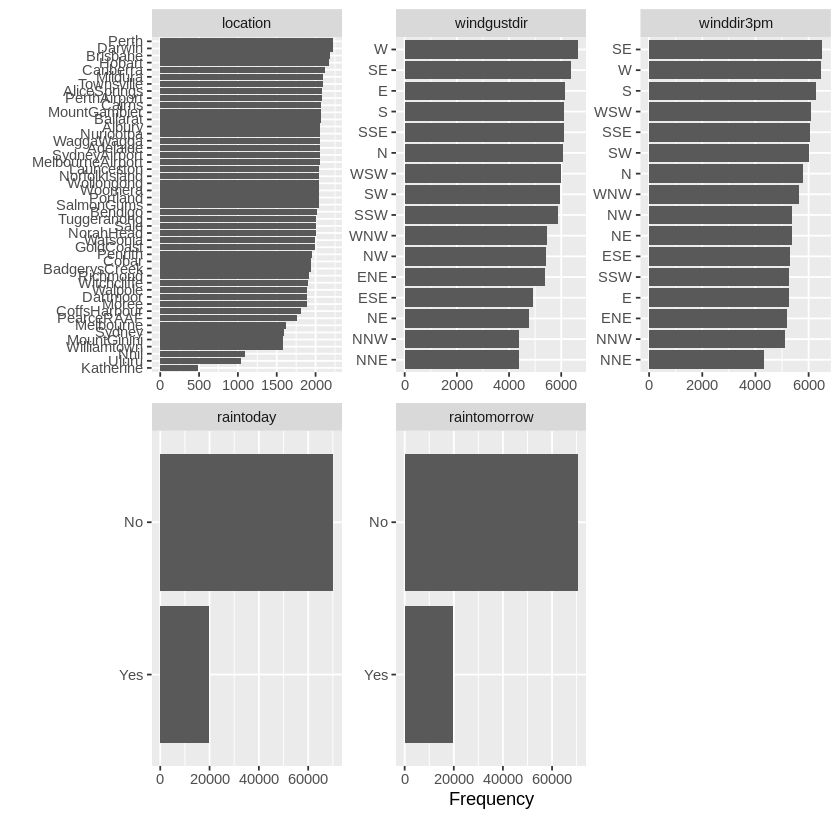

In [14]:
#먼저 범주형 클래스 확인
plot_bar(train)

In [15]:
nrow(table(df$location))  #최대 47클래스있음 date는 어떻게할까 ? 

[1] 47

In [17]:
str(train)

'data.frame':	90003 obs. of  16 variables:
 $ date         : Date, format: "2015-08-29" "2010-02-27" ...
 $ location     : chr  "MountGinini" "Perth" "Cairns" "Portland" ...
 $ mintemp      : num  -2.7 21.5 24.4 7 12.9 7.1 12.6 16.3 17.4 3.2 ...
 $ maxtemp      : num  4.3 37.9 30.5 12.5 23.2 19.4 21.9 32.6 34.3 17.6 ...
 $ rainfall     : num  0 0 48.4 4.2 0 0 11.4 0 0 0 ...
 $ windgustdir  : chr  "WSW" "ENE" "SSE" "SSE" ...
 $ windgustspeed: int  41 41 35 35 35 39 19 26 72 28 ...
 $ winddir3pm   : chr  "WSW" "E" "NNE" "SW" ...
 $ windspeed9am : int  19 19 9 13 2 20 15 13 17 6 ...
 $ windspeed3pm : int  17 19 13 19 20 22 13 11 17 7 ...
 $ humidity9am  : int  98 47 89 63 76 62 90 53 42 80 ...
 $ humidity3pm  : int  58 20 82 69 52 26 61 19 19 47 ...
 $ temp9am      : num  -1.3 26.6 25.9 10 16.5 11.1 15.6 22 24 9.9 ...
 $ temp3pm      : num  3.9 37.4 28.3 11.8 22.6 18.6 20.1 31.2 32.9 16.6 ...
 $ raintoday    : chr  "No" "No" "Yes" "Yes" ...
 $ raintomorrow : chr  "No" "No" "Yes" "No" ...


In [18]:
#캐릭터->팩터 변경 
for (j in c(2,6,8,15:16)){
  train[,j]<-as.factor(train[,j])
}
str(train)

'data.frame':	90003 obs. of  16 variables:
 $ date         : Date, format: "2015-08-29" "2010-02-27" ...
 $ location     : Factor w/ 47 levels "Adelaide","Albury",..: 23 30 8 32 17 40 44 41 24 4 ...
 $ mintemp      : num  -2.7 21.5 24.4 7 12.9 7.1 12.6 16.3 17.4 3.2 ...
 $ maxtemp      : num  4.3 37.9 30.5 12.5 23.2 19.4 21.9 32.6 34.3 17.6 ...
 $ rainfall     : num  0 0 48.4 4.2 0 0 11.4 0 0 0 ...
 $ windgustdir  : Factor w/ 16 levels "E","ENE","ESE",..: 16 2 11 11 8 10 8 6 13 13 ...
 $ windgustspeed: int  41 41 35 35 35 39 19 26 72 28 ...
 $ winddir3pm   : Factor w/ 16 levels "E","ENE","ESE",..: 16 1 6 13 8 3 3 1 6 9 ...
 $ windspeed9am : int  19 19 9 13 2 20 15 13 17 6 ...
 $ windspeed3pm : int  17 19 13 19 20 22 13 11 17 7 ...
 $ humidity9am  : int  98 47 89 63 76 62 90 53 42 80 ...
 $ humidity3pm  : int  58 20 82 69 52 26 61 19 19 47 ...
 $ temp9am      : num  -1.3 26.6 25.9 10 16.5 11.1 15.6 22 24 9.9 ...
 $ temp3pm      : num  3.9 37.4 28.3 11.8 22.6 18.6 20.1 31.2 32.9 16.6 ...

In [20]:
#TEST적용
for (j in c(2,6,8,15:16)){
  test[,j]<-as.factor(test[,j])
}

In [19]:
#그냥 하기
rf<-randomForest(raintomorrow ~. ,  train) ; rf


Call:
 randomForest(formula = raintomorrow ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 14.05%
Confusion matrix:
       No   Yes class.error
No  66463  4007  0.05686108
Yes  8638 10895  0.44222598

1. 기본 500개 트리 생성
2.oob(out of bag) 오차율 14.05%

## 4. 파라미터 튜닝

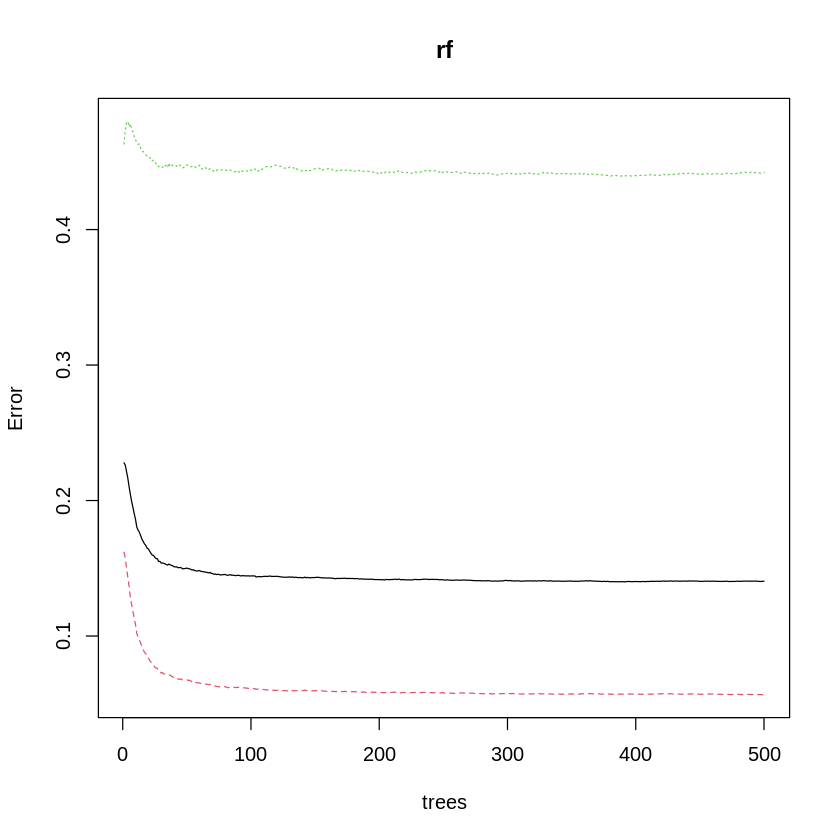

In [21]:
##트리 수에 따른 오차 보기
plot(rf) 

In [23]:
#최소 오차율 위치로 최적 트리수 찾기
which.min(rf$err.rate[,1]) 

[1] 391

- 정확도 최적화에 필요한 트리수는 391이면 됨

In [24]:
#파라미터 최적화
rf2<-randomForest(raintomorrow ~. ,  train , ntree=391)
print(rf2)


Call:
 randomForest(formula = raintomorrow ~ ., data = train, ntree = 391) 
               Type of random forest: classification
                     Number of trees: 391
No. of variables tried at each split: 3

        OOB estimate of  error rate: 14.06%
Confusion matrix:
       No   Yes class.error
No  66454  4016  0.05698879
Yes  8634 10899  0.44202119


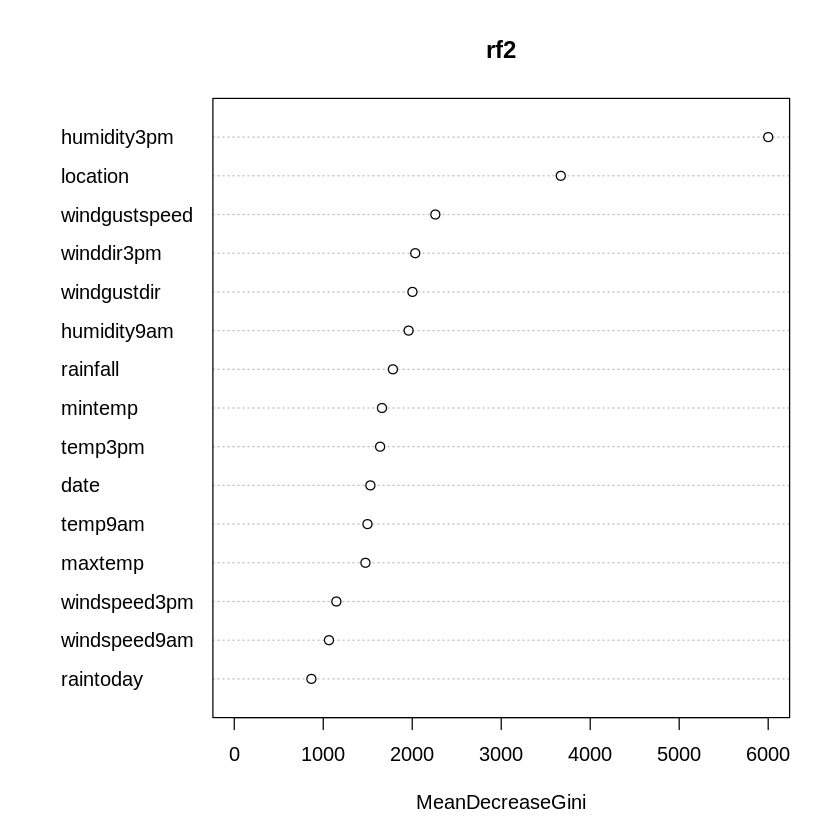

In [27]:
#변수 중요도
varImpPlot(rf2)

1. 각 변수의 지니 인덱스 평균 감소에 대한 기여도
2. 가장 중요한 변수는 `humidity3pm`

## 5. 평가

In [50]:
#1. 트레인 모형 평가
pred_rf2<-predict(rf2, train[,-16])

In [51]:
str(pred_rf2)       # 라벨이 붙음

#test[,16]%>%head(5)

 Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 2 1 1 ...
 - attr(*, "names")= chr [1:38573] "8" "10" "11" "16" ...


In [53]:
as.data.frame(  pred_rf2) %>%head(5)  # 확인해보니 트레인 데이터 인덱스인것같음

,pred_rf2
,<fct>
8,No
10,No
11,No
16,Yes
17,Yes


In [72]:
#그래서 그냥 모형평가를 위해 타겟 뺸 새로운 데이터프레임 만듦
train_new<-train[,-16]
test_new<-test[,-16]

In [73]:
#다시 트레인 모형평가
pred_train<-predict(rf2, train_new, type="response")

In [74]:
pred_train %>% head(5)

53009 118314  84923  75450 132374 
    No     No    Yes     No     No 
Levels: No Yes

In [78]:
#pred_train<-as.vector( pred_train )    # 1. 벡터로로 바꾸고
pred_train<-as.factor(pred_train)        # 2. 다시 팩터 변환  

[1] "factor"

In [83]:
#head(pred_train)
train[,16] %>% head(5) %>% class()

[1] "factor"

In [87]:
#library(caret)

str(pred_train)
str(train[,16])

 Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 2 1 ...
 Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 2 1 ...


In [90]:
confusionMatrix(pred_train, train[,16])

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  70470     0
       Yes     0 19533
                                   
               Accuracy : 1        
                 95% CI : (1, 1)   
    No Information Rate : 0.783    
    P-Value [Acc > NIR] : < 2.2e-16
                                   
                  Kappa : 1        
                                   
 Mcnemar's Test P-Value : NA       
                                   
            Sensitivity : 1.000    
            Specificity : 1.000    
         Pos Pred Value : 1.000    
         Neg Pred Value : 1.000    
             Prevalence : 0.783    
         Detection Rate : 0.783    
   Detection Prevalence : 0.783    
      Balanced Accuracy : 1.000    
                                   
       'Positive' Class : No       
                                   

In [91]:
#테스트 모형 적합
pred_test<-predict(rf2, test_new, type="response")
pred_test %>% head(5)

8  10  11  16  17 
 No  No  No Yes Yes 
Levels: No Yes

In [92]:
pred_test<-as.vector( pred_test )    # 1. 벡터로로 바꾸고
pred_test<-as.factor(pred_test)        # 2. 다시 팩터 변환  

In [93]:
confusionMatrix(pred_test, test[,16])   # Accuracy : 0.8587

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  28396  3715
       Yes  1736  4726
                                          
               Accuracy : 0.8587          
                 95% CI : (0.8552, 0.8621)
    No Information Rate : 0.7812          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5486          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9424          
            Specificity : 0.5599          
         Pos Pred Value : 0.8843          
         Neg Pred Value : 0.7314          
             Prevalence : 0.7812          
         Detection Rate : 0.7362          
   Detection Prevalence : 0.8325          
      Balanced Accuracy : 0.7511          
                                          
       'Positive' Class : No              
                  

- Accuracy : 0.8587

In [96]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [98]:
#roc
roc_test<-roc( as.numeric(pred_test), test[,16] %>%as.numeric()    )
auc(roc_test) # 0.8078

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.8078

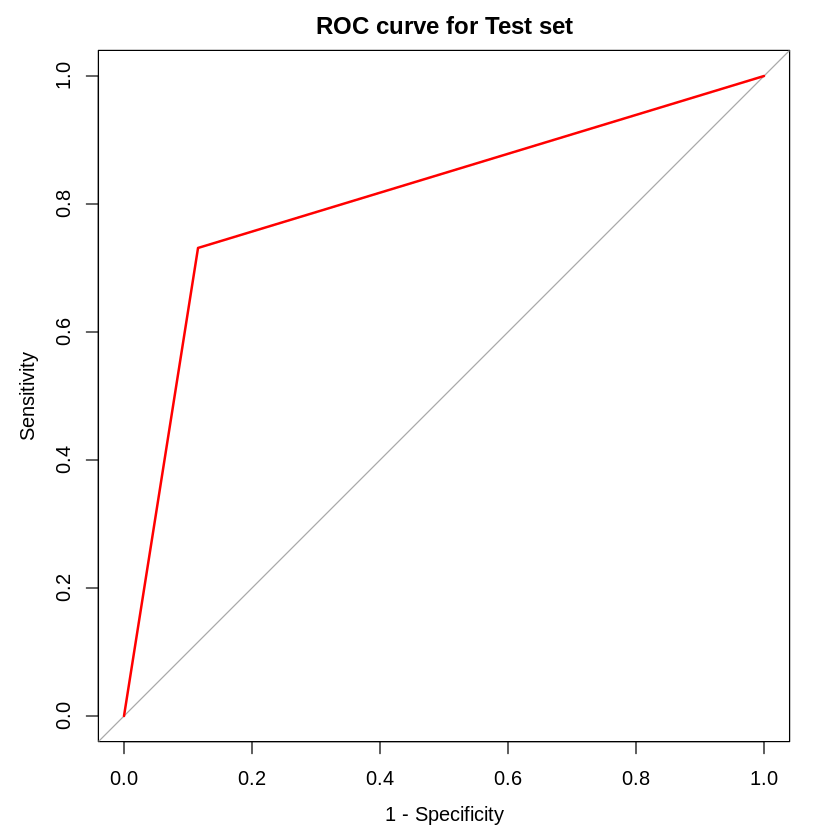

In [99]:
plot.roc(roc_test, main="ROC curve for Test set", col="red", legacy.axes=T)

In [100]:
#저장
write.csv(pred_test, "pred_test.csv", row.names=FALSE )